## [1] DecisionTreeClassifier 클래스 사용하기

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier         

X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [4]:
? DecisionTreeClassifier

Init signature:
 DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth 

In [5]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3,
                             min_samples_split=3,
                             random_state=1234)
clf = clf.fit(X_train, y_train)

In [7]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

In [8]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## [2] 트리 구조의 이해

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [10]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1234)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=1234)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.6\ngini = 0.667\nsamples = 100\nvalue = [33, 33, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.65\ngini = 0.5\nsamples = 67\nvalue = [0, 33, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.157\nsamples = 35\nvalue = [0, 32, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

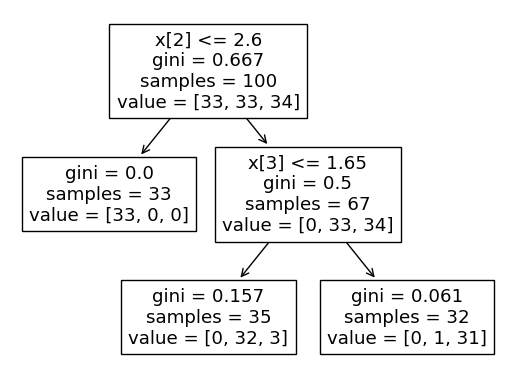

In [11]:
tree.plot_tree(clf)

## [3] GridSearchCV 로 결정 트리의 하이퍼파라미터 튜닝하기 (사전 가지치기)

In [18]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X.iloc[0, 0] = np.nan
X.iloc[1, 0] = np.nan
X.iloc[2, 2] = np.nan
X.iloc[3, 4] = np.nan
X.iloc[4, 3] = np.nan
X.iloc[5, 1] = np.nan
X.iloc[5, 2] = np.nan





X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1234)

In [19]:
max_depths = [None, 3, 6]   ### max_depth가 None이면, 잎 노드의 클래스가 동일할 때 까지 분할 (혹은 min_samples_leaf가 되거나)
min_samples_splits = [2, 3, 4]

In [22]:
pipeline=Pipeline(steps=[('imputer',SimpleImputer()),('scaler',StandardScaler()),('basemodel',DecisionTreeClassifier(criterion='gini',random_state=1234))])
param_grid={'basemodel__max_depth':max_depths,'basemodel__min_samples_split':min_samples_splits}
kfold=KFold(n_splits=4, shuffle=True, random_state=1234) 

In [23]:
grid_search=GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('basemodel',
                                        DecisionTreeClassifier(random_state=1234))]),
             param_grid={'basemodel__max_depth': [None, 3, 6],
                         'basemodel__min_samples_split': [2, 3, 4]})

In [26]:
print('최적 max_depth:',grid_search.best_params_['basemodel__max_depth'])
print('최적 min_saples_split:',grid_search.best_params_['basemodel__min_samples_split'])
print('최적 모델의 교차검증 스코어', grid_search.best_score_)


최적 max_depth: 3
최적 min_saples_split: 2
최적 모델의 교차검증 스코어 0.9319784870393228


In [27]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report
y_pred = grid_search.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.94      0.94      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [43]:
grid_search

GridSearchCV(cv=KFold(n_splits=4, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('basemodel',
                                        DecisionTreeClassifier(random_state=1234))]),
             param_grid={'basemodel__max_depth': [None, 3, 6],
                         'basemodel__min_samples_split': [2, 3, 4]})

In [42]:
grid_search.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('basemodel',
                 DecisionTreeClassifier(max_depth=3, random_state=1234))])

In [45]:
grid_search.best_estimator_['basemodel']

DecisionTreeClassifier(max_depth=3, random_state=1234)

[Text(0.5, 0.875, 'x[7] <= 0.055\ngini = 0.465\nsamples = 426\nvalue = [157, 269]'),
 Text(0.25, 0.625, 'x[23] <= 0.137\ngini = 0.081\nsamples = 260\nvalue = [11, 249]'),
 Text(0.125, 0.375, 'x[29] <= -1.493\ngini = 0.039\nsamples = 251\nvalue = [5, 246]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.031\nsamples = 250\nvalue = [4, 246]'),
 Text(0.375, 0.375, 'x[29] <= -1.021\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.625, 'x[22] <= -0.136\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.625, 0.375, 'x[21] <= 0.029\ngini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.6875, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.875, 0.375, 'x[21] <= -0.785\ngini = 0.066\nsamples = 146\nvalue = [141, 5]'),
 

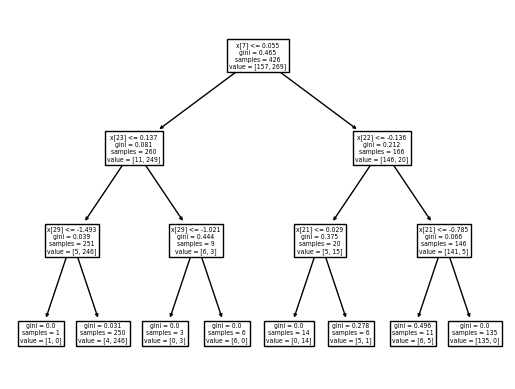

In [41]:
tree.plot_tree(grid_search.best_estimator_['basemodel'])

## [4] 회귀 트리 구현하기

In [29]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [30]:
from sklearn.tree import DecisionTreeRegressor

scaler = StandardScaler()
reg = DecisionTreeRegressor(random_state=1234,
                            max_depth=4,
                            min_samples_split=4)
pipe = Pipeline(steps=[("scaler", scaler), ("reg", reg)])
pipe = pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
print(f'학습 데이터셋 MAE:{(np.abs(y_pred_train - y_train)).mean(): .2f}')
print(f'학습 데이터셋 R2:{pipe.score(X_train,y_train): .2f}')

y_pred = pipe.predict(X_test)
print(f'테스트 데이터셋 MAE:{(np.abs(y_pred - y_test)).mean(): .2f}')
print(f'테스트 데이터셋 R2:{pipe.score(X_test,y_test): .2f}')

학습 데이터셋 MAE: 39.30
학습 데이터셋 R2: 0.59
테스트 데이터셋 MAE: 45.67
테스트 데이터셋 R2: 0.38


In [48]:
y_pred

array([147.89473684, 190.48      , 112.04166667, 112.04166667,
       159.16071429, 190.48      , 190.48      ,  82.50877193,
       112.04166667,  82.50877193, 112.04166667, 244.48387097,
       141.5       ,  82.50877193, 112.04166667, 112.04166667,
        82.50877193,  82.50877193, 244.48387097, 147.89473684,
       241.5       , 112.04166667, 159.16071429, 244.48387097,
       244.48387097, 159.16071429, 112.04166667, 244.48387097,
       190.48      ,  82.50877193, 112.04166667, 112.04166667,
       112.04166667, 112.04166667, 294.28571429, 244.48387097,
       244.48387097, 112.04166667, 159.16071429,  82.50877193,
       190.48      ,  82.50877193, 190.48      , 257.        ,
       159.16071429, 159.16071429,  82.50877193, 244.48387097,
        82.50877193, 159.16071429, 112.04166667, 147.89473684,
       159.16071429, 159.16071429, 159.16071429, 190.48      ,
       159.16071429, 190.48      , 257.9       , 159.16071429,
        82.50877193, 244.48387097, 190.48      , 131.66

[Text(0.45535714285714285, 0.9, 'x[2] <= 0.142\nsquared_error = 6018.646\nsamples = 296\nvalue = 150.953'),
 Text(0.19642857142857142, 0.7, 'x[8] <= 0.134\nsquared_error = 3592.887\nsamples = 182\nvalue = 118.511'),
 Text(0.10714285714285714, 0.5, 'x[5] <= 2.173\nsquared_error = 2478.292\nsamples = 131\nvalue = 101.168'),
 Text(0.07142857142857142, 0.3, 'x[6] <= 0.479\nsquared_error = 2204.612\nsamples = 129\nvalue = 98.992'),
 Text(0.03571428571428571, 0.1, 'squared_error = 2766.512\nsamples = 72\nvalue = 112.042'),
 Text(0.10714285714285714, 0.1, 'squared_error = 1008.039\nsamples = 57\nvalue = 82.509'),
 Text(0.14285714285714285, 0.3, 'squared_error = 132.25\nsamples = 2\nvalue = 241.5'),
 Text(0.2857142857142857, 0.5, 'x[3] <= -0.942\nsquared_error = 3698.761\nsamples = 51\nvalue = 163.059'),
 Text(0.21428571428571427, 0.3, 'x[7] <= 0.319\nsquared_error = 384.204\nsamples = 7\nvalue = 106.286'),
 Text(0.17857142857142858, 0.1, 'squared_error = 77.188\nsamples = 4\nvalue = 92.25'),


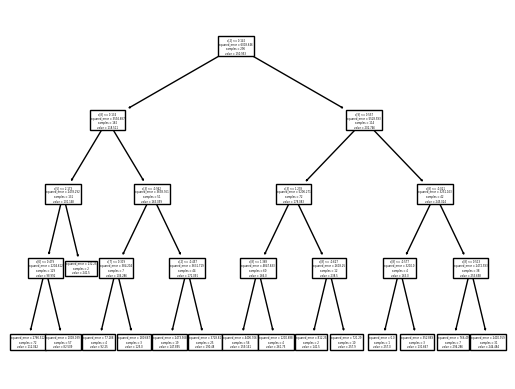

In [46]:
tree.plot_tree(pipe['reg'])

## 실습 1. GridSearchCV로 결정 트리의 하이퍼파라미터 튜닝하고, 성능 및 tree plot하기

In [52]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1234)


X.iloc[0, 0] = np.nan
X.iloc[1, 0] = np.nan
X.iloc[2, 2] = np.nan
X.iloc[3, 4] = np.nan
X.iloc[4, 3] = np.nan
X.iloc[5, 1] = np.nan
X.iloc[5, 2] = np.nan

In [53]:
max_depths = [3, 4, 5]   ### max_depth가 None이면, 잎 노드의 클래스가 동일할 때 까지 분할 (혹은 min_samples_leaf가 되거나)
min_samples_splits = [2, 3, 4]